# DSCI 100 Group Project: Predicting Disease Diagnoses

## Introduction

The Multiple Disease Prediction dataset uses various health-related parameters (such as glucose and cholesterol levels, insulin levels, and BMI) to check the health of a person - whether they are healthy or afflicted with a specific disease (Diabetes, Thalasse, Anemia, or Thromboc). In this project, we set out to create a classification model to examine to what accuracy we can predict the disease a person with certain parameters can be diagnosed with.

## Exploratory Data Analysis

### Loading libraries

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Loading the data

In [2]:
blood_samples <- read_csv("data/blood_samples_dataset.csv")
head(blood_samples)

Rows: 2351 Columns: 25
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Disease
dbl (24): Glucose, Cholesterol, Hemoglobin, Platelets, White Blood Cells, Re...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,⋯,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.7395967,0.65019839,0.7136310,0.8684912,0.68743303,0.5298954,0.29000591,0.6310450,0.001327858,0.79582887,⋯,0.50266478,0.21556024,0.5129406,0.064187347,0.6108265,0.9394849,0.09551153,0.4659570,0.76923007,Healthy
0.1217863,0.02305844,0.9448932,0.9053721,0.50771099,0.4030332,0.16421644,0.3075532,0.207938382,0.50556186,⋯,0.85680991,0.65246533,0.1069609,0.942548790,0.3442609,0.6663681,0.65905978,0.8169820,0.40116596,Diabetes
0.4525390,0.11613494,0.5445599,0.4006403,0.29453814,0.3820214,0.62526682,0.2951217,0.868369381,0.02680775,⋯,0.46679526,0.38733206,0.4217631,0.007186305,0.5069182,0.4317036,0.41729472,0.7990741,0.77920791,Thalasse
0.1366093,0.01560536,0.4199566,0.1914869,0.08116814,0.1662139,0.07329274,0.6687192,0.125447394,0.50105141,⋯,0.01625564,0.04013658,0.8267207,0.265415289,0.5941479,0.2257555,0.49034861,0.6370613,0.35409400,Anemia
0.1767372,0.75221994,0.9717794,0.7852856,0.44388019,0.4398514,0.89499119,0.4421588,0.257287888,0.80598748,⋯,0.42943127,0.14629354,0.2215736,0.015280079,0.5671149,0.8414118,0.15334985,0.7940080,0.09497032,Thalasse
0.8982223,0.25870628,0.9333065,0.3530817,0.37395165,0.2971385,0.90001024,0.9854882,0.679007358,0.35577395,⋯,0.38946078,0.52991391,0.2226867,0.772461190,0.1199938,0.8942734,0.12812415,0.3790165,0.75143777,Diabetes


The dataset is already in tidy format where each column is a variable, each row is a single observation, and each cell is a value.
All values in the dataset also have already been centered and scaled to a standard number from 0 to 1. 

The column names are not in the correct format as there are capital leters and spaces. The `Disease` column is also of type character when it should be factor type as there are distinct classes.

We will use clean_names and mutate the `Disease` column to be a factor

In [3]:
blood_samples <- blood_samples |>
                clean_names() |>
                mutate(disease = as_factor(disease))

head(blood_samples)

glucose,cholesterol,hemoglobin,platelets,white_blood_cells,red_blood_cells,hematocrit,mean_corpuscular_volume,mean_corpuscular_hemoglobin,mean_corpuscular_hemoglobin_concentration,⋯,hb_a1c,ldl_cholesterol,hdl_cholesterol,alt,ast,heart_rate,creatinine,troponin,c_reactive_protein,disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.7395967,0.65019839,0.7136310,0.8684912,0.68743303,0.5298954,0.29000591,0.6310450,0.001327858,0.79582887,⋯,0.50266478,0.21556024,0.5129406,0.064187347,0.6108265,0.9394849,0.09551153,0.4659570,0.76923007,Healthy
0.1217863,0.02305844,0.9448932,0.9053721,0.50771099,0.4030332,0.16421644,0.3075532,0.207938382,0.50556186,⋯,0.85680991,0.65246533,0.1069609,0.942548790,0.3442609,0.6663681,0.65905978,0.8169820,0.40116596,Diabetes
0.4525390,0.11613494,0.5445599,0.4006403,0.29453814,0.3820214,0.62526682,0.2951217,0.868369381,0.02680775,⋯,0.46679526,0.38733206,0.4217631,0.007186305,0.5069182,0.4317036,0.41729472,0.7990741,0.77920791,Thalasse
0.1366093,0.01560536,0.4199566,0.1914869,0.08116814,0.1662139,0.07329274,0.6687192,0.125447394,0.50105141,⋯,0.01625564,0.04013658,0.8267207,0.265415289,0.5941479,0.2257555,0.49034861,0.6370613,0.35409400,Anemia
0.1767372,0.75221994,0.9717794,0.7852856,0.44388019,0.4398514,0.89499119,0.4421588,0.257287888,0.80598748,⋯,0.42943127,0.14629354,0.2215736,0.015280079,0.5671149,0.8414118,0.15334985,0.7940080,0.09497032,Thalasse
0.8982223,0.25870628,0.9333065,0.3530817,0.37395165,0.2971385,0.90001024,0.9854882,0.679007358,0.35577395,⋯,0.38946078,0.52991391,0.2226867,0.772461190,0.1199938,0.8942734,0.12812415,0.3790165,0.75143777,Diabetes


### Summarizing the training data

Here we will use the distinct function to see how many unique disease classes are in the dataset.

In [4]:
unique_diseases <- select(blood_samples, disease) |>
            distinct()
unique_diseases

disease
<fct>
Healthy
Diabetes
Thalasse
Anemia
Thromboc


Spliting the data into a training subset and a testing subset. 75% of the total data goes to training, 25% to testing.

In [5]:
blood_samples_split <- initial_split(blood_samples, prop = 0.75, strata = disease)
training_blood_samples <- training(blood_samples_split)
# testing_blood_samples <- testing(blood_samples_split)  # not used yet

How many observations are there for each disease.

In [6]:
obersvation_count <- training_blood_samples |>
            group_by(disease) |>
            summarize(count = n())
obersvation_count

disease,count
<fct>,<int>
Healthy,416
Diabetes,405
Thalasse,380
Anemia,467
Thromboc,93


### Visualizing the training data

This is a series of histograms comparing the number of a healthy red blood cells a person has.
Anemia is condition where a person doesn't have enough healthy red blood cells. Looking at the normalized graph there is a clear trend that people with Anemia have less healthy red blood cells.

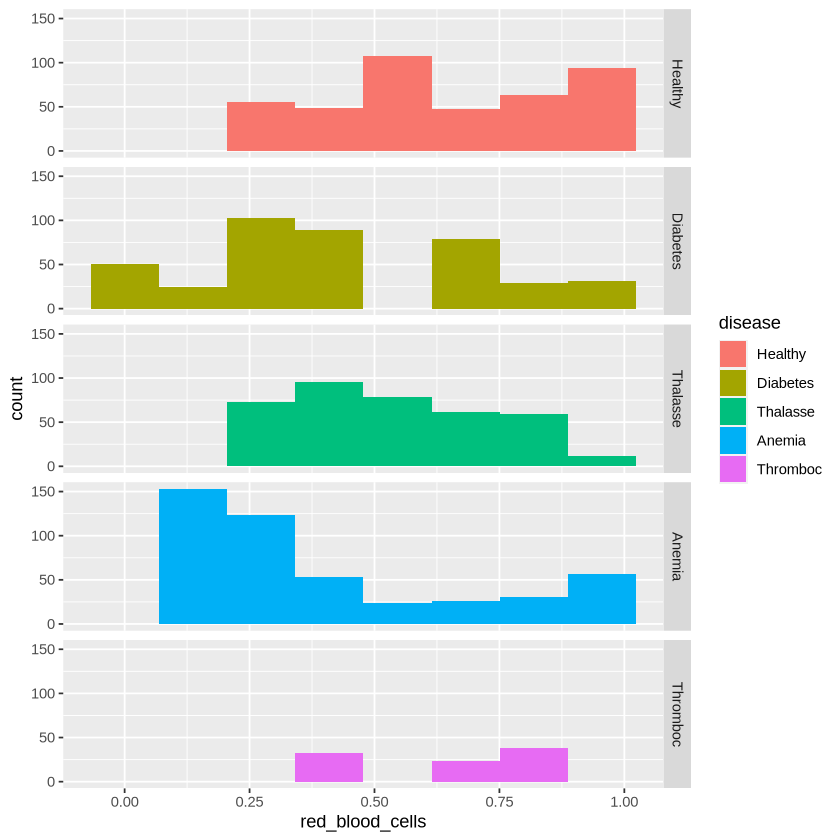

In [7]:
red_blood_histogram <- training_blood_samples |> 
                        ggplot(aes(x=red_blood_cells, fill = disease)) +
                        geom_histogram(bins = 8) +
                        facet_grid(rows = vars(disease))
red_blood_histogram

## Methods

Because the parameters required to predict each disease are not necessarily the same, we will need to identify which parameters dictate the diagnoses of each disease. One way this could be done is by creating histograms to visualize the distribution of each parameter per each disease, and, by comparing these with the parameter histograms of the other diseases, determine if there are patterns for parameters amongst each disease.

Then, once we have identified which parameters dictate for each disease, we can build our classification model(s) to identify which disease a person with certain parameters could be diagnosed with.

## Expected Outcomes

Through our data analysis, we anticipiate there will be relationships between health parameters and specific diseases. We hypothesize that there will be patterns where elevated or reduced levels of a particular health parameter will predict the presence of a disease. Although for the purposes of this course, our model will be fairly naive, to create an accurate model that can achieve such predictions would have an impact on healthcare. Such predictions can allow these at-risk individuals to seek the support they need. Therefore, it also raises a number of potential future questions:
- Are there additional health parameters that should be measured for training the model?
- Are there ethical concerns regarding the use of using classification models to predict health risks?
- How would an individual input such information into the model to receive a diagnosis?
- We have only learned about k-nearest neighbour classifiers in this class, is there a different classifier that would perform better?